Mapeo Logístico
============================

Primero, definimos la función que calcula la iteración x_n del mapeo:

In [1]:
function mapeo_logistico(x_n,r)
    return r*x_n*(1-x_n)
end

mapeo_logistico (generic function with 1 method)

Ahora, para una condición(población) inicial calculamos 1000 iteraciones para encontrar el punto fijo

In [2]:
function punto_fijo(x0,r)
    x_1=x0
    for i in 1:1000
        x_1 = mapeo_logistico(x_1,r)
    end
    return x_1
end

punto_fijo (generic function with 1 method)

Utilizamos r entre 0 y 4, que es la región de interés.La siguiente función evalua el mapeo logistico para estos valores y para condiciones iniciales entre 0 y 1.

In [4]:
A = zeros(1000,4000)
list_r= 0:0.001:4
list_x= 0:0.001:1
for i in 1:1000, j in 1:4000
    A[i,j] = punto_fijo(list_x[i],list_r[j]) 
end


Ahora llamamos a PyPlot:

In [11]:
using PyPlot

Ahora creamos un arreglo para graficar r contra x y transponemos 
la matriz donde calculamos los datos del mapeo ya que para poder graficar necesitamos utilizar las columnas como 
vector renglon.

In [16]:
B =zeros(4000,1000)
for i in 1:4000, j in 1:1000
    B[i,j]=A[j,i]
end
r=linspace(0,4,4000)

linspace(0.0,4.0,4000)

Para graficar, creamos una figura en PyPlot y usamos sublot, para poner distintas graficas en la misma figura, el tipo de grafica es scatter ya que necesitamos graficar los puntos a los que converge el mapeo. Las columnas de B corresponden a distintos valores de x entre 0 y 1, y todas recorren de 0 a 4 en r. 

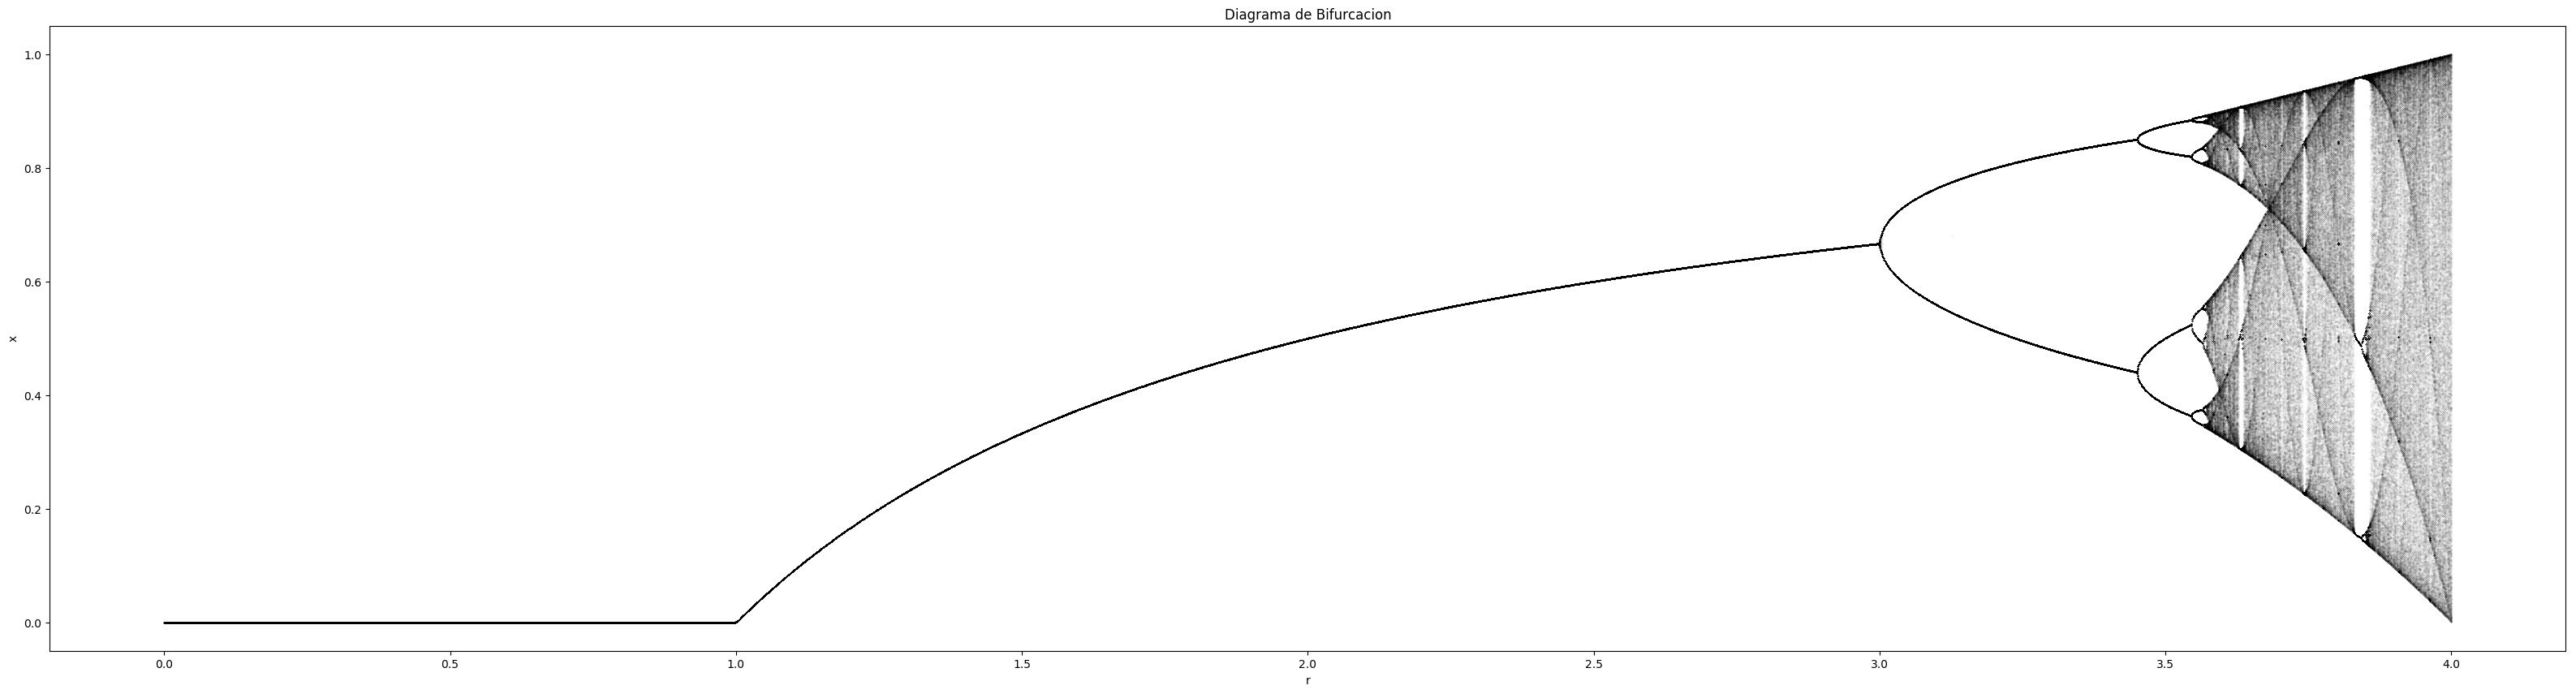

In [18]:
ax = PyPlot.figure("Diagrama de Bifurcacion 1",figsize=(40,10))
PyPlot.subplot() 
xlabel("r")
ylabel("x")
title("Diagrama de Bifurcacion")
for i in 10:1000
    PyPlot.scatter(r,B[:,i],s=0.0006, c="black")    
end

In [107]:
Finalmente hacemos un acercamiento de la region r entre 2.4 y 4, donde se observan mas ramas:

In [22]:
B2=zeros(1000,1600)
for i in 1:1600, j in 1:1000
    B2[i,j]=B[i+2400,j]
end
r2=linspace(2.4,4,1600)

linspace(2.4,4.0,1600)

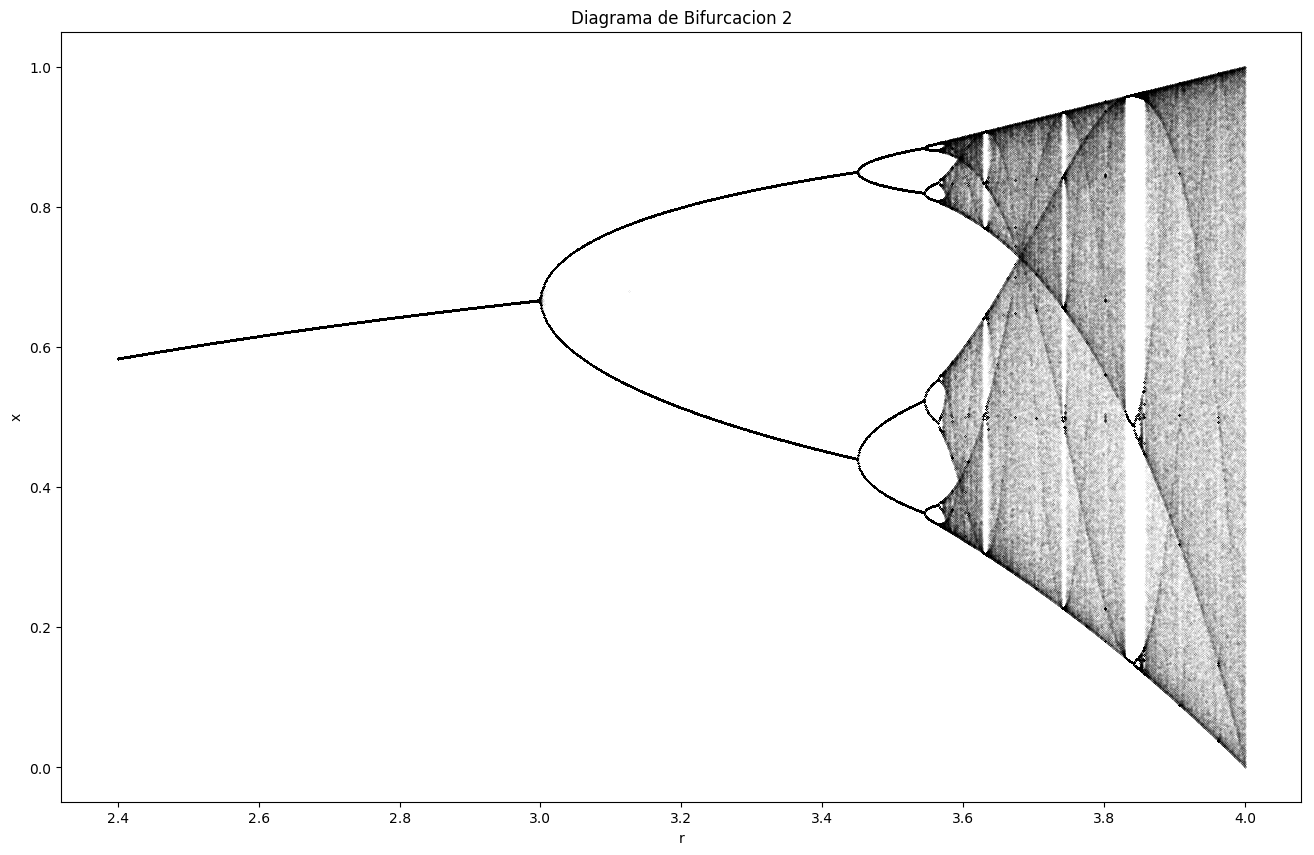

In [24]:
ax2 = PyPlot.figure("Diagrama de Bifurcacion",figsize=(16,10))
PyPlot.subplot() 
xlabel("r")
ylabel("x")
title("Diagrama de Bifurcacion 2")
for i in 10:1000
    PyPlot.scatter(r2,B2[:,i],s=0.0006, c="black")    
end